# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Marketing Outcome Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'day_of_month' feature :
    - Aim is to treat 'day_of_month' as categorical variable rather than numerical and check how different groups will impact prediction.
- Ordinal encoding on 'education' and 'job' features :
    - Aim is to get education and job features encoded with rank rather than default encoding i.e., one-hot encoding.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [6]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes


In [7]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,1
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes,1
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no,1
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,2
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,2
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,2


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8930, 17)

In [12]:
# test data shape
bank_df_test.shape

(2232, 17)

In [13]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
19,student,single,secondary,no,372,no,no,telephone,8,jul,444,3,-1,0,unknown,yes
19,student,single,unknown,no,108,no,no,cellular,9,mar,273,2,182,1,success,yes
19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
19,student,single,unknown,no,779,no,no,cellular,1,apr,184,4,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes


In [14]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
20,student,single,unknown,no,829,no,no,cellular,9,jul,253,2,-1,0,unknown,yes
21,unemployed,single,secondary,no,1333,no,no,cellular,2,feb,120,1,-1,0,unknown,no
21,services,single,secondary,no,361,no,no,telephone,5,jun,329,1,95,1,other,no
21,student,single,unknown,no,1506,no,no,cellular,14,sep,340,1,-1,0,unknown,yes
21,student,single,secondary,no,224,no,no,cellular,30,apr,871,1,-1,0,unknown,yes
21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes
20,student,single,unknown,no,801,no,no,cellular,11,nov,244,2,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes


In [15]:
AutoClassifier.generate_custom_config("custom_bank_marketing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  day_of_month

Enter the index of corresponding binning method for feature day_of_month:  1

Enter the number of bins for feature day_of_month:  4



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  1



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  2

Enter the feature or list of features for OrdinalEncoding:  education, job



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  1



Customization of categorical encoding has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  3



Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_bank_marketing.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluding svm and knn from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1' and max_models to 7
# and verbose level 2 for detailed loggging
# Using custom config file for custom run

aml = AutoClassifier(exclude=['svm', 'knn'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_models=7,
                     verbose=2,
                     custom_config_file='custom_bank_marketing.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "day_of_month": {
            "Type": "Equal-Width",
            "NumOfBins": 4
        },
        "volatile": true
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "education",
            "job"
        ],
        "volatile": true
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "std"
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
default_value,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
day_of_month,BIGINT,8930,0,None,0,8930,0,0.0,100.0
duration,BIGINT,8930,0,None,0,8930,0,0.0,100.0
pdays,BIGINT,8930,0,None,0,2301,6629,0.0,100.0
job,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
marital,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
balance,BIGINT,8930,0,None,620,7770,540,0.0,100.0
contact,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0
age,BIGINT,8930,0,None,0,8930,0,0.0,100.0


            age    balance  day_of_month  duration  campaign     pdays  previous
func                                                                            
50%      39.000    556.500        15.000   257.000     2.000    -1.000     0.000
count  8930.000   8930.000      8930.000  8930.000  8930.000  8930.000  8930.000
mean     41.170   1554.507        15.642   373.889     2.499    51.773     0.846
min      18.000  -6847.000         1.000     2.000     1.000    -1.000     0.000
max      95.000  81204.000        31.000  3881.000    63.000   854.000    58.000
75%      49.000   1723.750        22.000   502.000     3.000    50.000     1.000
25%      32.000    126.250         8.000   139.000     1.000    -1.000     0.000
std      11.948   3309.121         8.433   348.056     2.753   109.305     2.337

Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
std,11.948,3309.121,8.433,348.056,2.753,109.305,2.337
25%,32,126.25,8,139,1,-1,0
50%,39,556.5,15,257,2,-1,0
75%,49,1723.75,22,502,3,50,1
max,95,81204,31,3881,63,854,58
min,18,-6847,1,2,1,-1,0
mean,41.17,1554.507,15.642,373.889,2.499,51.773,0.846
count,8930,8930,8930,8930,8930,8930,8930



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


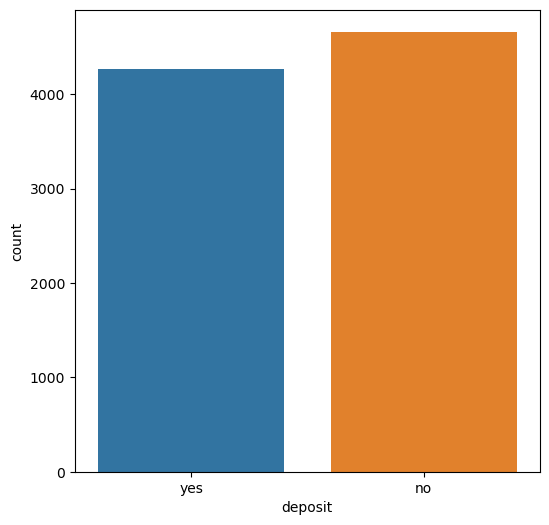

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    balance           9.462486
1   campaign           5.341545
2        age           1.601344
3      pdays          17.077268
4   duration           5.565510
5   previous          11.466965


Analysis completed. No action taken.                                                    


Skipping customized anti-select columns.                                                


Analysis indicates all categorical columns are significant. No action Needed.            


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


housing,poutcome,loan,month_of_year,education,age,balance,marital,previous,duration,campaign,default_value,pdays,contact,deposit,id,job,day_of_month
no,success,no,nov,primary,76,3324,married,3,122,1,no,92,cellular,1,80,retired,day_of_month_2
no,failure,no,feb,secondary,76,2302,married,2,110,1,no,87,telephone,0,104,retired,day_of_month_1
no,unknown,no,oct,primary,76,163,married,0,120,1,no,-1,telephone,0,120,retired,day_of_month_2
no,success,no,feb,primary,76,3324,married,4,309,1,no,90,cellular,1,128,retired,day_of_month_2
no,success,no,oct,primary,76,1411,divorced,3,233,2,no,187,telephone,1,152,housemaid,day_of_month_3
no,success,no,jul,unknown,93,775,married,7,860,2,no,177,cellular,1,160,retired,day_of_month_3
no,unknown,no,mar,primary,76,3049,divorced,0,170,3,no,-1,cellular,1,144,retired,day_of_month_4
no,unknown,no,nov,primary,76,1492,married,0,383,1,no,-1,telephone,1,88,retired,day_of_month_1
no,unknown,no,apr,primary,76,1411,divorced,0,170,3,no,-1,telephone,1,72,housemaid,day_of_month_2
no,unknown,no,oct,secondary,76,4112,married,0,282,2,no,-1,telephone,1,48,retired,day_of_month_3


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


housing,poutcome,loan,month_of_year,age,balance,marital,previous,duration,campaign,default_value,pdays,contact,deposit,id,day_of_month,education,job
no,unknown,no,oct,76,163,married,0,120,1,no,-1,telephone,0,120,day_of_month_2,0,5
no,success,no,oct,76,1411,divorced,3,233,2,no,187,telephone,1,152,day_of_month_3,0,3
no,success,no,jul,93,775,married,7,860,2,no,177,cellular,1,160,day_of_month_3,3,5
no,success,no,aug,93,775,married,9,476,2,no,13,cellular,1,168,day_of_month_1,3,5
no,unknown,no,jun,26,1623,single,0,479,1,no,-1,cellular,1,232,day_of_month_1,2,4
no,unknown,no,may,26,401,single,0,188,2,no,-1,cellular,1,248,day_of_month_1,2,9
no,unknown,yes,jul,26,144,married,0,730,1,yes,-1,cellular,0,224,day_of_month_4,2,2
no,success,no,feb,76,3324,married,4,309,1,no,90,cellular,1,128,day_of_month_2,0,5
no,failure,no,feb,76,2302,married,2,110,1,no,87,telephone,0,104,day_of_month_1,1,5
no,success,no,nov,76,3324,married,3,122,1,no,92,cellular,1,80,day_of_month_2,0,5


['housing', 'poutcome', 'loan', 'month_of_year', 'marital', 'default_value', 'contact', 'day_of_month']


housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,age,balance,marital_0,marital_1,marital_2,previous,duration,campaign,default_value_0,default_value_1,pdays,contact_0,contact_1,contact_2,deposit,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,education,job
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,93,775,0,1,0,7,860,2,1,0,177,1,0,0,1,160,0,0,1,0,3,5
1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,26,1623,0,0,1,0,479,1,1,0,-1,1,0,0,1,232,1,0,0,0,2,4
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,26,401,0,0,1,0,188,2,1,0,-1,1,0,0,1,248,1,0,0,0,2,9
1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,26,110,0,0,1,0,1136,2,1,0,-1,1,0,0,1,256,0,0,0,1,1,7
1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,61,927,1,0,0,0,427,3,1,0,-1,1,0,0,1,30,0,0,0,1,1,5
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,61,56,0,1,0,0,288,3,1,0,-1,1,0,0,1,38,1,0,0,0,0,5
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,9569,1,0,0,0,43,2,1,0,-1,0,0,1,0,153,0,1,0,0,0,0
0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,151,0,0,1,1,590,1,1,0,370,1,0,0,1,185,0,1,0,0,1,0
0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,76,0,0,1,3,747,2,1,0,371,1,0,0,1,201,0,1,0,0,2,4
0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,124,0,1,0,2,604,4,1,0,366,0,1,0,1,217,0,1,0,0,1,0


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      pdays          17.077268
1   campaign           5.341545
2         id           0.761478
3        age           1.601344
4   duration           5.565510
5   previous          11.466965
6    balance           9.462486


['campaign', 'duration', 'age', 'id']


housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,age,balance,marital_0,marital_1,marital_2,previous,duration,campaign,default_value_0,default_value_1,pdays,contact_0,contact_1,contact_2,deposit,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,education,job
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,113,0,1,0,0,16,2,1,0,-1,1,0,0,0,265,0,1,0,0,1,1
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,-9,0,1,0,0,920,2,1,0,-1,0,0,1,1,26,0,1,0,0,0,7
0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,40,-60,0,1,0,0,250,1,1,0,-1,1,0,0,0,42,0,0,1,0,1,1
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,1034,0,1,0,0,368,2,1,0,-1,1,0,0,0,58,0,0,1,0,2,9
0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,40,19343,0,0,1,4,13,4,1,0,179,1,0,0,0,98,0,0,1,0,1,7
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,838,0,0,1,0,619,3,1,0,-1,0,0,1,0,106,0,1,0,0,3,4
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,61,5267,0,1,0,0,226,3,1,0,-1,1,0,0,1,22,0,1,0,0,2,5
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,61,56,0,1,0,0,288,3,1,0,-1,1,0,0,1,38,1,0,0,0,0,5
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,61,3114,0,1,0,0,381,1,1,0,-1,1,0,0,1,54,0,1,0,0,1,5
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,61,3371,0,1,0,0,299,2,1,0,-1,1,0,0,1,78,0,0,0,1,2,4


['balance', 'previous', 'pdays']


housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,age,balance,marital_0,marital_1,marital_2,previous,duration,campaign,default_value_0,default_value_1,pdays,contact_0,contact_1,contact_2,deposit,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,education,job
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,61,985,0,1,0,0,998,6,1,0,-1,1,0,0,1,118,0,0,1,0,1,4
1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,61,2,0,0,1,0,131,1,1,0,114,1,0,0,1,158,0,1,0,0,2,4
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,61,89,0,1,0,2,154,1,1,0,181,1,0,0,0,166,0,0,0,1,1,5
1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,61,538,1,0,0,1,394,3,1,0,189,1,0,0,1,174,0,1,0,0,2,6
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,61,1191,0,1,0,0,214,4,1,0,-1,1,0,0,1,206,0,0,1,0,1,9
1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,61,997,0,1,0,1,269,1,1,0,104,1,0,0,1,214,0,0,1,0,2,4
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,34,113,0,1,0,0,16,2,1,0,-1,1,0,0,0,265,0,1,0,0,1,1
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,-9,0,1,0,0,920,2,1,0,-1,0,0,1,1,26,0,1,0,0,0,7
0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,40,-60,0,1,0,0,250,1,1,0,-1,1,0,0,0,42,0,0,1,0,1,1
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,1034,0,1,0,0,368,2,1,0,-1,1,0,0,0,58,0,0,1,0,2,9


['day_of_month_1', 'day_of_month_2', 'poutcome_0', 'month_of_year_5', 'contact_0', 'loan_0', 'month_of_year_11', 'contact_1', 'month_of_year_2', 'month_of_year_3', 'previous', 'marital_1', 'duration', 'campaign', 'month_of_year_9', 'month_of_year_4', 'pdays', 'month_of_year_8', 'poutcome_2', 'contact_2', 'loan_1', 'month_of_year_7', 'month_of_year_10', 'marital_2', 'month_of_year_0', 'day_of_month_3', 'age', 'education', 'day_of_month_0', 'housing_1', 'default_value_1', 'month_of_year_1', 'month_of_year_6', 'marital_0', 'default_value_0', 'poutcome_3', 'poutcome_1', 'balance', 'job']


['previous', 'duration', 'campaign', 'pdays', 'age', 'education', 'balance', 'job']


day_of_month_1,day_of_month_2,poutcome_0,month_of_year_5,contact_1,contact_0,loan_0,month_of_year_11,month_of_year_2,month_of_year_3,marital_1,month_of_year_9,month_of_year_4,month_of_year_8,poutcome_2,contact_2,deposit,id,loan_1,month_of_year_7,month_of_year_10,marital_2,month_of_year_0,day_of_month_3,day_of_month_0,housing_1,default_value_1,month_of_year_1,month_of_year_6,marital_0,default_value_0,poutcome_3,poutcome_1,previous,duration,campaign,pdays,age,education,balance,job
1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,11,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1.4081538317307678,-0.18944787745254366,-0.003059032734605163,2.846525321005292,-1.934644261051275,2.3153951628452907,-0.7060316756269472,1.077438546424392
1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,17,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,-0.3978909888440635,1.9773610730464317,-0.003059032734605163,-0.43629902737487464,-0.5856617400292727,0.9564461067529111,-0.6662950238652966,-0.7705140750009434
0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,18,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,-0.3978909888440635,0.27336568478995593,0.7911678329267471,-0.43629902737487464,-0.04606873162047179,-0.40250294933946834,-0.3243506784426712,0.7694464428535028
1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,19,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,-0.3978909888440635,-0.9004978048978385,-0.003059032734605163,-0.43629902737487464,-1.934644261051275,-1.7614520054318479,-0.7112601824376907,1.077438546424392
1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,22,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.3978909888440635,-0.38719549041070256,0.7911678329267471,-0.43629902737487464,1.8425067978103313,0.9564461067529111,-0.2563800899030056,0.1534622357117244
0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,25,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,3.214198652305599,-0.2357292336767936,-0.7972858983959573,1.3575940591716644,-0.5856617400292727,0.9564461067529111,-0.818967422739007,-0.15452986785916487
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,7687,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,-0.3978909888440635,-0.7406167561231568,1.5853946985880993,-0.43629902737487464,-1.574915588778741,0.9564461067529111,-0.4906171950243147,-1.3864982821427219
0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,7690,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,-0.3978909888440635,-0.22310704561563455,-0.7972858983959573,-0.43629902737487464,-0.4957295719611392,0.9564461067529111,1.780646163562665,-0.15452986785916487
1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,7691,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,-0.3978909888440635,-0.004322452555543811,-0.003059032734605163,-0.43629902737487464,0.40359210872019563,-1.7614520054318479,1.6781674300720921,-1.0785061785718326
0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,7692,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,-0.3978909888440635,-0.3030475700029754,-0.7972858983959573,0.5682811010911873,0.4935242767883291,-0.40250294933946834,-0.14971855096383802,-1.0785061785718326


['housing_1', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3', 'loan_0', 'loan_1', 'month_of_year_0', 'month_of_year_1', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'age', 'balance', 'marital_0', 'marital_1', 'marital_2', 'previous', 'duration', 'campaign', 'pdays', 'contact_0', 'contact_2', 'day_of_month_0', 'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'education', 'job']


['r_age', 'r_balance', 'r_previous', 'r_duration', 'r_campaign', 'r_pdays', 'r_education', 'r_job']


r_poutcome_1,r_month_of_year_5,r_contact_2,r_month_of_year_9,r_marital_1,r_poutcome_2,r_month_of_year_1,r_month_of_year_3,r_month_of_year_10,r_poutcome_3,r_month_of_year_0,r_poutcome_0,r_month_of_year_7,id,r_month_of_year_4,r_day_of_month_1,r_housing_1,r_marital_2,r_contact_0,r_day_of_month_3,r_marital_0,r_month_of_year_6,r_loan_0,r_loan_1,r_day_of_month_2,r_month_of_year_11,deposit,r_month_of_year_8,r_day_of_month_0,r_age,r_balance,r_previous,r_duration,r_campaign,r_pdays,r_education,r_job
0,0,0,0,0,1,0,0,0,0,0,0,1,11,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-1.9346442610512737,-0.7060316756269477,1.4081538317307767,-0.18944787745254374,-0.0030590327346051737,2.8465253210052657,2.315395162845273,1.0774385464243994
0,1,0,0,1,0,0,0,0,1,0,0,0,17,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,-0.5856617400292723,-0.6662950238652969,-0.397890988844066,1.9773610730464328,-0.0030590327346051737,-0.4362990273748706,0.9564461067529039,-0.7705140750009485
0,1,0,0,1,0,0,0,0,1,0,0,0,18,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,-0.04606873162047176,-0.32435067844267135,-0.397890988844066,0.2733656847899561,0.7911678329267499,-0.4362990273748706,-0.40250294933946534,0.769446442853508
0,1,0,0,0,0,0,0,0,1,0,0,0,19,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-1.9346442610512737,-0.7112601824376912,-0.397890988844066,-0.9004978048978389,-0.0030590327346051737,-0.4362990273748706,-1.7614520054318346,1.0774385464243994
0,0,0,0,1,0,0,1,0,1,0,0,0,22,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1.8425067978103302,-0.2563800899030057,-0.397890988844066,-0.3871954904107028,0.7911678329267499,-0.4362990273748706,0.9564461067529039,0.15346223571172543
0,0,0,0,1,1,1,0,0,0,0,0,0,25,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,-0.5856617400292723,-0.8189674227390075,3.214198652305619,-0.23572923367679371,-0.7972858983959602,1.3575940591716518,0.9564461067529039,-0.1545298678591659
0,0,0,1,1,0,0,0,0,1,0,0,0,9734,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,-0.8554582442336726,-0.7196257933348807,-0.397890988844066,-1.1361119820394752,3.173848429910815,-0.4362990273748706,0.9564461067529039,1.3854306499952906
0,0,0,0,1,0,1,0,0,1,0,0,0,9738,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1.0331172851971293,-0.2563800899030057,-0.397890988844066,-0.8794608247959071,0.7911678329267499,-0.4362990273748706,-1.7614520054318346,-1.0785061785718397
0,0,0,1,1,0,0,0,0,1,0,0,0,9746,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1.0331172851971293,-0.2563800899030057,-0.397890988844066,2.326574942738501,0.7911678329267499,-0.4362990273748706,-0.40250294933946534,-1.0785061785718397
0,0,0,0,1,0,0,0,0,1,0,0,0,9750,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,-0.8554582442336726,-0.8126932145661152,-0.397890988844066,-0.8289720725512708,1.585394698588105,-0.4362990273748706,-0.40250294933946534,1.6934227535661819


['age', 'balance', 'previous', 'duration', 'campaign', 'pdays', 'education', 'job']


day_of_month_1,day_of_month_2,poutcome_0,month_of_year_5,contact_0,loan_0,month_of_year_11,contact_1,month_of_year_2,month_of_year_3,marital_1,month_of_year_9,month_of_year_4,month_of_year_8,poutcome_2,contact_2,deposit,id,loan_1,month_of_year_7,month_of_year_10,marital_2,month_of_year_0,day_of_month_3,day_of_month_0,housing_1,housing_0,default_value_1,month_of_year_1,month_of_year_6,marital_0,default_value_0,poutcome_3,poutcome_1,age,balance,previous,duration,campaign,pdays,education,job
0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,118,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1.8425067978103167,0.21104841897746388,-0.39789098884405255,2.860914237327567,3.173848429910753,-0.4362990273748839,-0.4025029493394786,-0.15452986785916348
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,158,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1.8425067978103167,-0.816876020014709,-0.39789098884405255,-0.7868981123474067,-0.7972858983959447,1.6266780221536798,0.9564461067529355,-0.15452986785916348
0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,166,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1.8425067978103167,-0.7259000015077721,3.214198652305511,-0.6901280038785205,-0.7972858983959447,2.8285863901398867,-0.4025029493394786,0.15346223571172302
1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,174,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1.8425067978103167,-0.2563800899030054,1.4081538317307292,0.3196470410142059,0.7911678329267344,2.972097837063613,0.9564461067529355,0.46145433928260954
0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,206,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1.8425067978103167,0.42646289958009626,-0.39789098884405255,-0.43768424265533884,1.585394698588074,-0.4362990273748839,-0.4025029493394786,1.385430649995269
0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,214,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1.8425067978103167,0.22359683532324828,1.4081538317307292,-0.20627746153408907,-0.7972858983959447,1.4472887134990222,0.9564461067529355,-0.15452986785916348
1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,265,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,-0.5856617400292681,-0.7008031688162033,-0.39789098884405255,-1.270748654691838,-0.0030590327346051143,-0.4362990273748839,-0.4025029493394786,-1.078506178571823
1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,26,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,-0.04606873162047142,-0.8283787349983448,-0.39789098884405255,2.5327373477374313,-0.0030590327346051143,-0.4362990273748839,-1.7614520054318927,0.7694464428534961
0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,42,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,-0.04606873162047142,-0.8817095044679285,-0.39789098884405255,-0.2862179859214299,-0.7972858983959447,-0.4362990273748839,-0.4025029493394786,-1.078506178571823
0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,58,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,-0.04606873162047142,0.26228778572275024,-0.39789098884405255,0.21025474448416054,-0.0030590327346051143,-0.4362990273748839,0.9564461067529355,1.385430649995269


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19']


                                                                                          
Skipping customized hyperparameter tuning


response_column : deposit                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
---------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.804236,0.804236,0.804236,0.804236,0.803753,0.805505,0.803829,0.806389,0.804236,0.804517
1,2,DECISIONFOREST_1,rfe,0.796534,0.796534,0.796534,0.796534,0.795297,0.795469,0.795380,0.796599,0.796534,0.796564
2,3,DECISIONFOREST_2,pca,0.778562,0.778562,0.778562,0.778562,0.777261,0.777092,0.777173,0.778500,0.778562,0.778528
3,4,GLM_1,rfe,0.760591,0.760591,0.760591,0.760591,0.759694,0.757521,0.758259,0.760272,0.760591,0.760088
4,5,GLM_2,pca,0.605263,0.605263,0.605263,0.605263,0.717742,0.574411,0.507903,0.707081,0.605263,0.524762
5,6,XGBOOST_0,lasso,0.596277,0.596277,0.596277,0.596277,0.741353,0.623955,0.552956,0.757325,0.596277,0.542238
6,7,XGBOOST_1,rfe,0.587933,0.587933,0.587933,0.587933,0.655494,0.609644,0.563865,0.665009,0.587933,0.555973


In [17]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.804236,0.804236,0.804236,0.804236,0.803753,0.805505,0.803829,0.806389,0.804236,0.804517
1,2,DECISIONFOREST_1,rfe,0.796534,0.796534,0.796534,0.796534,0.795297,0.795469,0.795380,0.796599,0.796534,0.796564
2,3,DECISIONFOREST_2,pca,0.778562,0.778562,0.778562,0.778562,0.777261,0.777092,0.777173,0.778500,0.778562,0.778528
3,4,GLM_1,rfe,0.760591,0.760591,0.760591,0.760591,0.759694,0.757521,0.758259,0.760272,0.760591,0.760088
4,5,GLM_2,pca,0.605263,0.605263,0.605263,0.605263,0.717742,0.574411,0.507903,0.707081,0.605263,0.524762
5,6,XGBOOST_0,lasso,0.596277,0.596277,0.596277,0.596277,0.741353,0.623955,0.552956,0.757325,0.596277,0.542238
6,7,XGBOOST_1,rfe,0.587933,0.587933,0.587933,0.587933,0.655494,0.609644,0.563865,0.665009,0.587933,0.555973


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.804236,0.804236,0.804236,0.804236,0.803753,0.805505,0.803829,0.806389,0.804236,0.804517


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'deposit',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.1,
 'max_depth': 4,
 'min_node_size': 4,
 'num_trees': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

In [21]:
aml.model_hyperparameters(rank=3)

{'response_column': 'deposit',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.0,
 'max_depth': 8,
 'min_node_size': 2,
 'num_trees': 40,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


housing,poutcome,loan,month_of_year,education,age,balance,marital,previous,duration,campaign,default_value,pdays,contact,id,day_of_month,job,deposit
yes,unknown,no,feb,primary,49,1830,married,0,136,1,no,-1,cellular,69,15,services,1
yes,unknown,no,jul,secondary,49,280,married,0,162,3,no,-1,telephone,109,14,services,0
yes,success,no,apr,secondary,49,3608,married,1,252,1,no,168,cellular,117,30,admin.,1
yes,unknown,no,jul,primary,49,11,married,0,166,8,yes,-1,telephone,165,31,unemployed,0
yes,failure,yes,apr,secondary,49,1127,married,1,162,2,no,281,cellular,205,17,blue-collar,0
yes,unknown,no,nov,tertiary,49,1050,married,0,924,1,no,-1,cellular,229,18,management,1
no,unknown,yes,feb,tertiary,26,313,single,0,210,2,no,-1,cellular,24,26,admin.,1
no,unknown,no,feb,secondary,26,632,single,0,218,1,no,-1,cellular,40,12,unemployed,1
no,unknown,no,feb,tertiary,26,2170,single,0,317,1,no,-1,cellular,48,3,unemployed,0
no,unknown,no,jun,secondary,26,132,single,0,217,1,no,-1,cellular,80,4,student,1


housing,poutcome,loan,month_of_year,education,age,balance,marital,previous,duration,campaign,default_value,pdays,contact,deposit,id,job,day_of_month
no,unknown,no,apr,secondary,26,3676,single,0,148,1,no,-1,cellular,1,144,self-employed,day_of_month_1
no,unknown,no,jan,secondary,26,335,single,0,393,2,no,-1,telephone,0,168,services,day_of_month_4
no,unknown,no,feb,tertiary,26,11862,single,0,119,1,no,-1,cellular,1,176,technician,day_of_month_2
no,unknown,no,apr,secondary,26,507,single,0,380,1,no,-1,cellular,1,200,technician,day_of_month_4
no,success,no,jul,secondary,26,2007,single,2,272,3,no,182,cellular,1,240,blue-collar,day_of_month_2
no,unknown,no,feb,secondary,26,1114,single,0,44,2,no,-1,cellular,0,256,services,day_of_month_2
yes,unknown,no,feb,primary,49,1830,married,0,136,1,no,-1,cellular,1,69,services,day_of_month_2
yes,unknown,no,jul,secondary,49,280,married,0,162,3,no,-1,telephone,0,109,services,day_of_month_2
yes,success,no,apr,secondary,49,3608,married,1,252,1,no,168,cellular,1,117,admin.,day_of_month_4
yes,unknown,no,jul,primary,49,11,married,0,166,8,yes,-1,telephone,0,165,unemployed,day_of_month_4


housing,poutcome,loan,month_of_year,age,balance,marital,previous,duration,campaign,default_value,pdays,contact,deposit,id,day_of_month,education,job
no,unknown,no,feb,26,11862,single,0,119,1,no,-1,cellular,1,176,day_of_month_2,2,9
no,success,no,jul,26,2007,single,2,272,3,no,182,cellular,1,240,day_of_month_2,1,1
no,unknown,no,feb,26,1114,single,0,44,2,no,-1,cellular,0,256,day_of_month_2,1,7
no,unknown,no,jun,26,667,divorced,0,177,2,no,-1,telephone,0,264,day_of_month_3,2,4
no,success,no,jun,26,2786,single,1,300,2,no,72,cellular,1,296,day_of_month_1,2,4
no,unknown,no,jun,26,3178,single,0,64,1,no,-1,cellular,0,304,day_of_month_1,2,4
yes,success,no,apr,49,3608,married,1,252,1,no,168,cellular,1,117,day_of_month_4,1,0
yes,failure,yes,apr,49,1127,married,1,162,2,no,281,cellular,0,205,day_of_month_3,1,1
yes,unknown,no,nov,49,1050,married,0,924,1,no,-1,cellular,1,229,day_of_month_3,2,4
yes,unknown,yes,nov,49,66,married,0,59,4,no,-1,cellular,0,245,day_of_month_3,1,7


housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,age,balance,marital_0,marital_1,marital_2,previous,duration,campaign,default_value_0,default_value_1,pdays,contact_0,contact_1,contact_2,deposit,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,education,job
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,-236,1,0,0,0,204,2,1,0,-1,0,0,1,0,285,0,0,0,1,1,9
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,49,880,0,1,0,0,22,3,1,0,-1,1,0,0,0,333,0,0,1,0,1,0
0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,49,808,0,1,0,0,1232,1,1,0,-1,1,0,0,1,349,0,0,0,1,1,9
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,32,12198,0,0,1,0,178,1,1,0,-1,1,0,0,1,39,0,0,1,0,0,1
0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,32,4612,1,0,0,0,937,4,1,0,-1,1,0,0,0,63,0,0,0,1,1,7
0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,32,-262,1,0,0,0,85,24,1,0,-1,0,1,0,0,71,0,0,0,1,1,9
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,26,11862,0,0,1,0,119,1,1,0,-1,1,0,0,1,176,0,1,0,0,2,9
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,26,2007,0,0,1,2,272,3,1,0,182,1,0,0,1,240,0,1,0,0,1,1
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,26,1114,0,0,1,0,44,2,1,0,-1,1,0,0,0,256,0,1,0,0,1,7
1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,26,667,1,0,0,0,177,2,1,0,-1,0,1,0,0,264,0,0,1,0,2,4


id,day_of_month_1,day_of_month_2,poutcome_0,month_of_year_5,contact_0,loan_0,month_of_year_11,contact_1,month_of_year_2,month_of_year_3,previous,marital_1,duration,campaign,month_of_year_9,month_of_year_4,pdays,month_of_year_8,poutcome_2,contact_2,loan_1,month_of_year_7,month_of_year_10,marital_2,month_of_year_0,day_of_month_3,age,education,day_of_month_0,housing_1,default_value_1,month_of_year_1,month_of_year_6,marital_0,default_value_0,poutcome_3,poutcome_1,balance,job,deposit
285,0,0,0,0,0,1,0,0,0,0,0,0,204,2,0,0,-1,1,0,1,0,0,0,0,0,1,49,1,0,1,0,0,0,1,1,1,0,-236,9,0
333,0,1,0,0,1,0,0,0,0,0,0,1,22,3,0,0,-1,1,0,0,1,0,0,0,0,0,49,1,0,1,0,0,0,0,1,1,0,880,0,0
349,0,0,0,0,1,1,0,0,0,0,0,1,1232,1,0,1,-1,0,0,0,0,0,0,0,0,1,49,1,0,1,0,0,0,0,1,1,0,808,9,1
39,0,1,0,0,1,1,0,0,0,0,0,0,178,1,0,0,-1,1,0,0,0,0,0,1,0,0,32,0,0,1,0,0,0,0,1,1,0,12198,1,1
63,0,0,0,1,1,1,0,0,0,0,0,0,937,4,0,0,-1,0,0,0,0,0,0,0,0,1,32,1,0,1,0,0,0,1,1,1,0,4612,7,0
71,0,0,0,0,0,1,0,1,0,0,0,0,85,24,0,0,-1,0,0,0,0,0,0,0,0,1,32,1,0,1,0,1,0,1,1,1,0,-262,9,0
176,1,0,0,0,1,1,0,0,0,1,0,0,119,1,0,0,-1,0,0,0,0,0,0,1,0,0,26,2,0,0,0,0,0,0,1,1,0,11862,9,1
240,1,0,0,1,1,1,0,0,0,0,2,0,272,3,0,0,182,0,1,0,0,0,0,1,0,0,26,1,0,0,0,0,0,0,1,0,0,2007,1,1
256,1,0,0,0,1,1,0,0,0,1,0,0,44,2,0,0,-1,0,0,0,0,0,0,1,0,0,26,1,0,0,0,0,0,0,1,1,0,1114,7,0
264,0,1,0,0,0,1,0,1,0,0,0,0,177,2,0,0,-1,0,0,0,0,0,0,0,0,0,26,2,0,0,0,0,1,1,1,1,0,667,4,0


day_of_month_1,day_of_month_2,poutcome_0,month_of_year_5,contact_1,contact_0,loan_0,month_of_year_11,month_of_year_2,month_of_year_3,marital_1,month_of_year_9,month_of_year_4,month_of_year_8,poutcome_2,contact_2,deposit,id,loan_1,month_of_year_7,month_of_year_10,marital_2,month_of_year_0,day_of_month_3,day_of_month_0,housing_1,default_value_1,month_of_year_1,month_of_year_6,marital_0,default_value_0,poutcome_3,poutcome_1,previous,duration,campaign,pdays,age,education,balance,job
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,256,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,-0.3978909888440635,-1.15294156612102,-0.003059032734605163,-0.43629902737487464,-1.3051190845743406,-0.40250294933946834,0.3459438946946465,0.7694464428535028
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,296,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1.4081538317307678,-0.07584818490211193,-0.003059032734605163,0.873242925804099,-1.3051190845743406,0.9564461067529111,2.0943565722072752,-0.15452986785916487
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,304,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,-0.3978909888440635,-1.068793645713293,-0.7972858983959573,-0.43629902737487464,-1.3051190845743406,0.9564461067529111,2.5042715061695664,-0.15452986785916487
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,320,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,-0.3978909888440635,-0.42506205459417984,-0.7972858983959573,-0.43629902737487464,-1.3051190845743406,-0.40250294933946834,-0.7729565628044641,1.3854306499952813
1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,77,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3.214198652305599,-0.9004978048978385,0.7911678329267471,2.7209528049470344,0.7633207809927296,-0.40250294933946834,0.19745430126953087,1.3854306499952813
1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,101,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.3978909888440635,6.954710565163496,1.5853946985880993,-0.43629902737487464,0.7633207809927296,-0.40250294933946834,-0.4843429868514225,0.7694464428535028
0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,229,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,-0.3978909888440635,2.549566931818977,-0.7972858983959573,-0.43629902737487464,0.7633207809927296,0.9564461067529111,0.2790190075171296,-0.15452986785916487
0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,277,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,5.020243472880431,0.5342242380539103,-0.003059032734605163,2.5595024271578457,0.7633207809927296,-1.7614520054318479,-0.818967422739007,0.7694464428535028
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,285,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,-0.3978909888440635,-0.4797582028592025,-0.003059032734605163,-0.43629902737487464,0.7633207809927296,-0.40250294933946834,-1.0657529442061004,1.3854306499952813
0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,293,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,-0.3978909888440635,0.7277644549916829,0.7911678329267471,-0.43629902737487464,0.7633207809927296,-1.7614520054318479,-0.9831425365963531,-1.0785061785718326


id,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,month_of_year_0,month_of_year_1,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,age,balance,marital_0,marital_1,marital_2,previous,duration,campaign,pdays,contact_0,contact_2,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,education,job,deposit
256,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,26,1114,0,0,1,0,44,2,-1,1,0,0,1,0,0,1,7,0
296,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,26,2786,0,0,1,1,300,2,72,1,0,1,0,0,0,2,4,1
304,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,26,3178,0,0,1,0,64,1,-1,1,0,1,0,0,0,2,4,0
320,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,26,44,0,0,1,0,217,1,-1,1,0,0,0,0,1,1,9,1
77,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,49,972,1,0,0,2,104,3,175,1,0,0,1,0,0,1,9,0
101,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,49,320,0,1,0,0,1971,4,-1,0,0,0,1,0,0,1,7,1
229,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,49,1050,0,1,0,0,924,1,-1,1,0,0,0,1,0,2,4,1
277,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,49,0,0,1,0,3,445,2,166,1,0,1,0,0,0,0,7,1
285,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,49,-236,1,0,0,0,204,2,-1,0,1,0,0,0,1,1,9,0
293,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,49,-157,0,1,0,0,491,3,-1,1,0,1,0,0,0,0,1,1


r_poutcome_1,r_contact_2,r_month_of_year_5,r_month_of_year_9,r_marital_1,r_poutcome_2,r_month_of_year_1,r_month_of_year_3,r_month_of_year_10,r_poutcome_3,deposit,r_day_of_month_1,id,r_month_of_year_0,r_month_of_year_4,r_month_of_year_7,r_poutcome_0,r_housing_1,r_marital_2,r_contact_0,r_day_of_month_3,r_marital_0,r_month_of_year_6,r_loan_0,r_loan_1,r_day_of_month_2,r_month_of_year_11,r_month_of_year_8,r_day_of_month_0,r_age,r_balance,r_previous,r_duration,r_campaign,r_pdays,r_education,r_job
0,0,0,0,0,0,0,1,0,1,0,1,256,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,-1.3051190845743397,0.3459438946946467,-0.397890988844066,-1.1529415661210207,-0.0030590327346051737,-0.4362990273748706,-0.40250294933946534,0.769446442853508
0,0,0,0,0,1,0,0,0,0,1,0,296,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,-1.3051190845743397,2.0943565722072766,1.4081538317307767,-0.07584818490211197,-0.0030590327346051737,0.8732429258040908,0.9564461067529039,-0.1545298678591659
0,0,0,0,0,0,0,0,0,1,0,0,304,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,-1.3051190845743397,2.5042715061695677,-0.397890988844066,-1.0687936457132934,-0.7972858983959602,-0.4362990273748706,0.9564461067529039,-0.1545298678591659
0,0,0,0,0,0,0,0,1,1,1,0,320,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,-1.3051190845743397,-0.7729565628044646,-0.397890988844066,-0.42506205459418,-0.7972858983959602,-0.4362990273748706,-0.40250294933946534,1.3854306499952906
0,0,0,1,0,0,0,0,0,0,0,1,77,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.763320780992729,0.197454301269531,3.214198652305619,-0.9004978048978389,0.7911678329267499,2.720952804947009,-0.40250294933946534,1.3854306499952906
0,0,0,0,1,0,0,1,0,1,1,1,101,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.763320780992729,-0.4843429868514228,-0.397890988844066,6.9547105651634995,1.585394698588105,-0.4362990273748706,-0.40250294933946534,0.769446442853508
0,0,0,1,1,0,0,0,0,1,1,0,229,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0.763320780992729,0.27901900751712977,-0.397890988844066,2.5495669318189784,-0.7972858983959602,-0.4362990273748706,0.9564461067529039,-0.1545298678591659
0,0,0,0,1,0,0,0,0,0,1,0,277,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0.763320780992729,-0.8189674227390075,5.020243472880462,0.5342242380539105,-0.0030590327346051737,2.5595024271578217,-1.7614520054318346,0.769446442853508
0,1,0,0,0,0,0,0,0,1,0,0,285,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0.763320780992729,-1.0657529442061011,-0.397890988844066,-0.47975820285920273,-0.0030590327346051737,-0.4362990273748706,-0.40250294933946534,1.3854306499952906
0,0,1,0,1,0,0,0,0,1,1,0,293,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0.763320780992729,-0.9831425365963536,-0.397890988844066,0.7277644549916832,0.7911678329267499,-0.4362990273748706,-1.7614520054318346,-1.0785061785718397


day_of_month_1,day_of_month_2,poutcome_0,month_of_year_5,contact_0,loan_0,month_of_year_11,contact_1,month_of_year_2,month_of_year_3,marital_1,month_of_year_9,month_of_year_4,month_of_year_8,poutcome_2,contact_2,deposit,id,loan_1,month_of_year_7,month_of_year_10,marital_2,month_of_year_0,day_of_month_3,day_of_month_0,housing_1,housing_0,default_value_1,month_of_year_1,month_of_year_6,marital_0,default_value_0,poutcome_3,poutcome_1,age,balance,previous,duration,campaign,pdays,education,job
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,285,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0.7633207809927235,-1.0657529442061,-0.39789098884405255,-0.47975820285920245,-0.0030590327346051143,-0.4362990273748839,-0.4025029493394786,1.385430649995269
0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,333,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.7633207809927235,0.10124977595185028,-0.39789098884405255,-1.2455042785695198,0.7911678329267344,-0.4362990273748839,-0.4025029493394786,-1.3864982821427094
0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,349,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0.7633207809927235,0.02595927787714382,-0.39789098884405255,3.8454449060979754,-0.7972858983959447,-0.4362990273748839,-0.4025029493394786,1.385430649995269
0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,39,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,-0.7655260761655336,11.936497792750847,-0.39789098884405255,-0.5891504993892478,-0.7972858983959447,-0.4362990273748839,-1.7614520054318927,-1.078506178571823
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,-0.7655260761655336,4.003807259490802,-0.39789098884405255,2.6042630800839994,1.585394698588074,-0.4362990273748839,-0.4025029493394786,0.7694464428534961
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,-0.7655260761655336,-1.0929411796219661,-0.39789098884405255,-0.9804383292851793,17.469932011814866,-0.4362990273748839,-0.4025029493394786,1.385430649995269
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,176,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,-1.3051190845743301,11.585142135068883,-0.39789098884405255,-0.837386864592043,-0.7972858983959447,-0.4362990273748839,0.9564461067529355,1.385430649995269
1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,240,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,-1.3051190845743301,1.279755211093436,3.214198652305511,-0.19365527347293,0.7911678329267344,2.8465253210053527,-0.4025029493394786,-1.078506178571823
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,256,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,-1.3051190845743301,0.3459438946946463,-0.39789098884405255,-1.15294156612102,-0.0030590327346051143,-0.4362990273748839,-0.4025029493394786,0.7694464428534961
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,264,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,-1.3051190845743301,-0.121484614185823,-0.39789098884405255,-0.5933578954096341,-0.0030590327346051143,-0.4362990273748839,0.9564461067529355,-0.15452986785916348


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,deposit
0,176,2.213387,-0.476014,6.175770,3.006122,-5.081268,6.656098,-4.279235,0.547021,-0.114438,...,-0.821114,0.235384,0.383807,0.654438,0.066789,0.112134,-0.240719,-0.086397,-0.066164,1
1,229,-0.270264,0.159366,0.679832,2.517129,0.525382,-0.201135,1.334056,0.540623,0.511634,...,0.484663,-0.512897,-0.435246,-0.118402,-0.075201,-0.151621,0.014419,-0.064915,-0.012474,1
2,240,3.990250,0.516561,-1.247330,-0.610213,0.896839,2.186910,-0.837866,-0.464979,-0.752464,...,-0.558188,-0.326823,0.174607,0.360531,-0.611429,0.005810,-0.509702,-1.024524,0.041988,1
3,277,4.302028,1.961153,-1.920758,-0.373840,1.931584,-1.325421,-1.365878,2.156085,-0.417495,...,0.446360,0.585246,-0.192652,-0.125791,0.364804,0.021628,-0.245528,-0.223878,0.312091,1
4,256,-0.284551,-1.292710,0.010928,-0.627648,-0.778007,0.257983,-1.309179,-0.721368,-0.693311,...,-0.757766,0.027476,-0.291188,0.299140,-0.051657,-0.152296,-0.134965,0.118440,-0.262455,0
5,285,-0.989840,-0.168358,0.131558,-0.611105,0.081164,-1.682125,-0.544861,0.879792,0.898572,...,0.239969,-0.346170,0.517497,-0.632435,-0.008702,0.882646,0.026712,0.091013,0.019151,0
6,264,-0.434960,-1.342243,-0.046427,-0.450436,-0.616318,0.525394,0.422884,-0.430255,-0.362992,...,0.552716,-0.889476,-0.318342,0.378783,-0.581862,0.984817,-0.250736,0.437997,0.197180,0
7,293,-1.497602,1.665838,-0.862536,0.076916,1.357142,-0.209220,-0.074961,-0.092876,-0.165024,...,0.296170,1.009874,-0.189194,-0.273466,-0.579780,-0.233525,-0.428723,-0.391700,0.188599,1
8,296,2.408324,-0.894747,0.379849,0.368689,-0.593028,1.979105,-0.400767,-0.141349,-0.663565,...,0.437743,0.564993,-0.134078,0.274709,-0.321245,0.009662,0.152835,-0.265817,-0.532839,1
9,333,-1.156362,1.334718,-0.292952,-1.310886,-0.357012,0.819872,0.391378,0.395264,0.377839,...,0.411096,-0.128403,0.581214,0.571421,0.854113,-0.096292,0.017480,-0.284401,-0.326278,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Prediction : 
    id  prediction  prob_1  prob_0  deposit
0  285           0    0.00    1.00        0
1  333           0    0.00    1.00        0
2  349           1    0.95    0.05        1
3   39           0    0.20    0.80        1
4   63           1    1.00    0.00        0
5   71           0    0.10    0.90        0
6  176           0    0.50    0.50        1
7  240           1    0.95    0.05        1
8  256           0    0.30    0.70        0
9  264           0    0.45    0.55        0

ROC-AUC : 


AUC,GINI
0.8710929916521066,0.7421859833042133


threshold_value,tpr,fpr
0.04081632653061224,0.9970588235294118,0.816006600660066
0.08163265306122448,0.9892156862745098,0.7062706270627063
0.1020408163265306,0.984313725490196,0.5981848184818482
0.12244897959183673,0.984313725490196,0.5981848184818482
0.16326530612244897,0.9764705882352941,0.5313531353135313
0.18367346938775508,0.9764705882352941,0.5313531353135313
0.14285714285714285,0.984313725490196,0.5981848184818482
0.061224489795918366,0.9892156862745098,0.7062706270627063
0.02040816326530612,0.9970588235294118,0.816006600660066
0.0,1.0,1.0



Confusion Matrix : 


array([[944, 268],
       [173, 847]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,deposit
10,1,0.6,0.4,0
12,1,0.8,0.2,0
13,1,0.95,0.05,1
14,1,0.8,0.2,1
16,1,0.95,0.05,0
17,1,0.95,0.05,1
15,1,0.8,0.2,1
11,0,0.1,0.9,0
9,0,0.05,0.95,0
8,1,0.85,0.15,1


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bank_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1      944      173   0.845121  0.778878  0.810648     1212
1               1  CLASS_2      268      847   0.759641  0.830392  0.793443     1020
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.802419
1       5     Macro-Precision     0.802381
2       6        Macro-Recall     0.804635
3       7            Macro-F1     0.802045
4       9     Weighted-Recall     0.802419
5      10         Weighted-F1     0.802786
6       8  Weighted-Precision     0.806058
7

In [25]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,944,173,0.8451208594449419,0.7788778877887789,0.810648346930013,1212
1,1,CLASS_2,268,847,0.7596412556053812,0.8303921568627451,0.7934426229508198,1020


In [26]:
remove_context()

True